In [47]:
using DataFrames, CSV, Random, PyPlot, PyCall
using Distributions
using KernelDensity: kde
@pyimport numpy as np
@pyimport scienceplots

In [48]:
df = CSV.read("./model11.csv", DataFrame)
start_num = 1
end_num = 401

time = df[start_num:end_num, 1]
u = df[start_num:end_num, 22]
v = df[start_num:end_num, 23]
r = df[start_num:end_num, 27] ./ 180 .* π
δ = df[start_num:end_num, 3] ./ 180 .* π
n_p = df[start_num:end_num, 2] ./ 60
x = df[start_num:end_num, 40]
y = df[start_num:end_num, 41]
ψ = df[start_num:end_num, 51] ./ 180 .* π

df = (
    time = time,
    u = u,
    v = v,
    r = r,
    δ = δ,
    n_p = n_p,
    x = x,
    y = y,
    ψ = ψ
)

CSV.write("20degmodel.csv", DataFrame(df))

"20degmodel.csv"

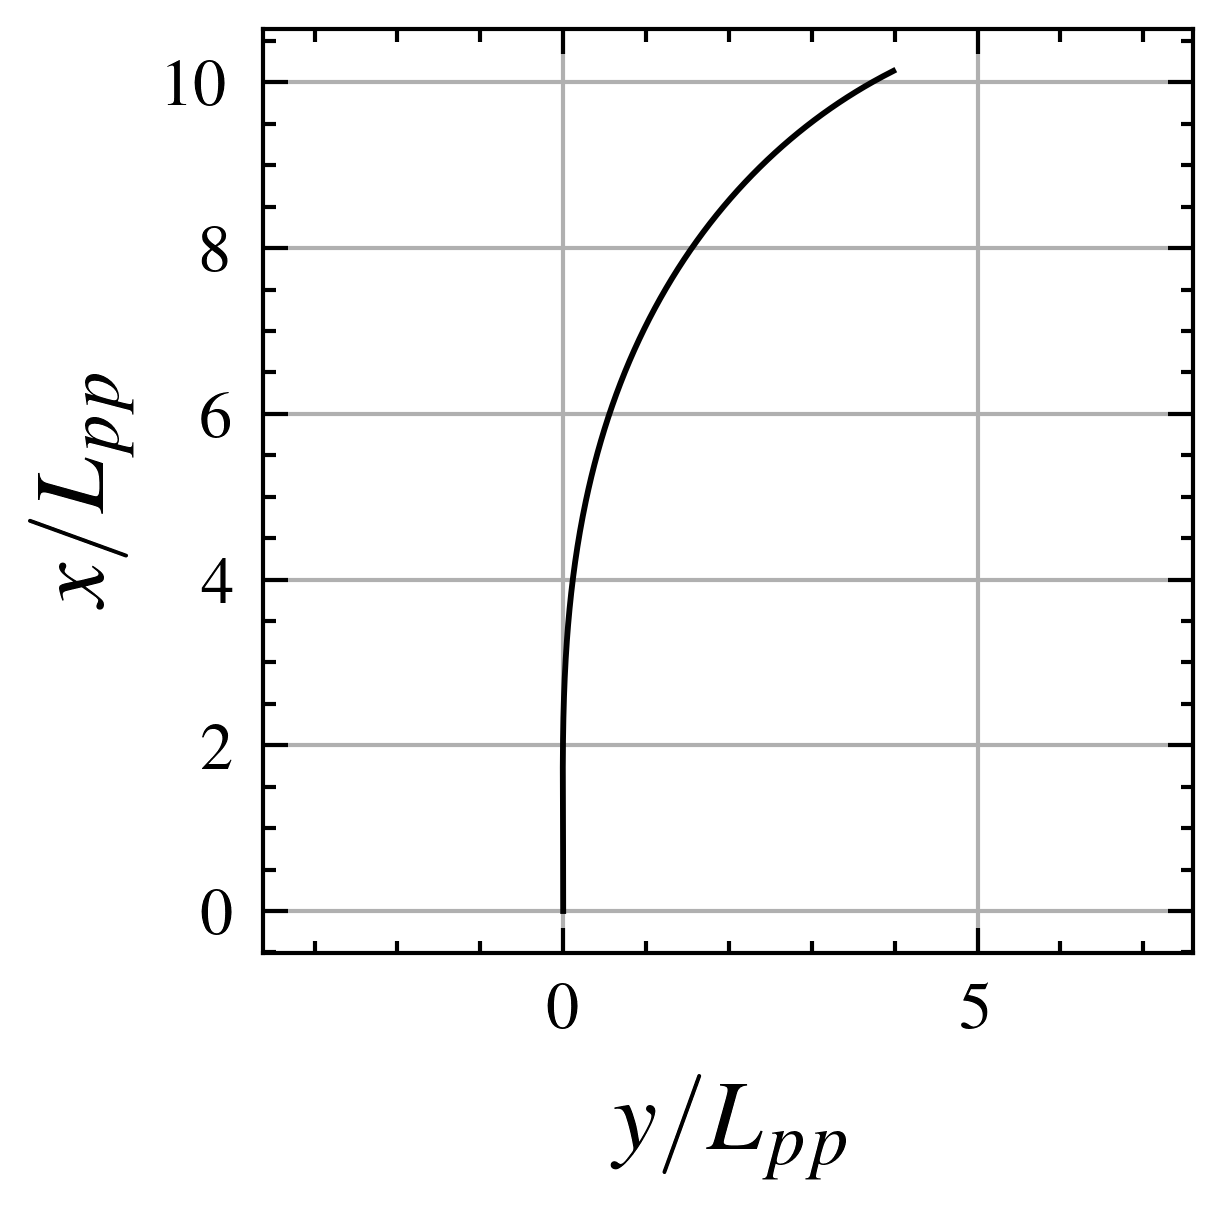

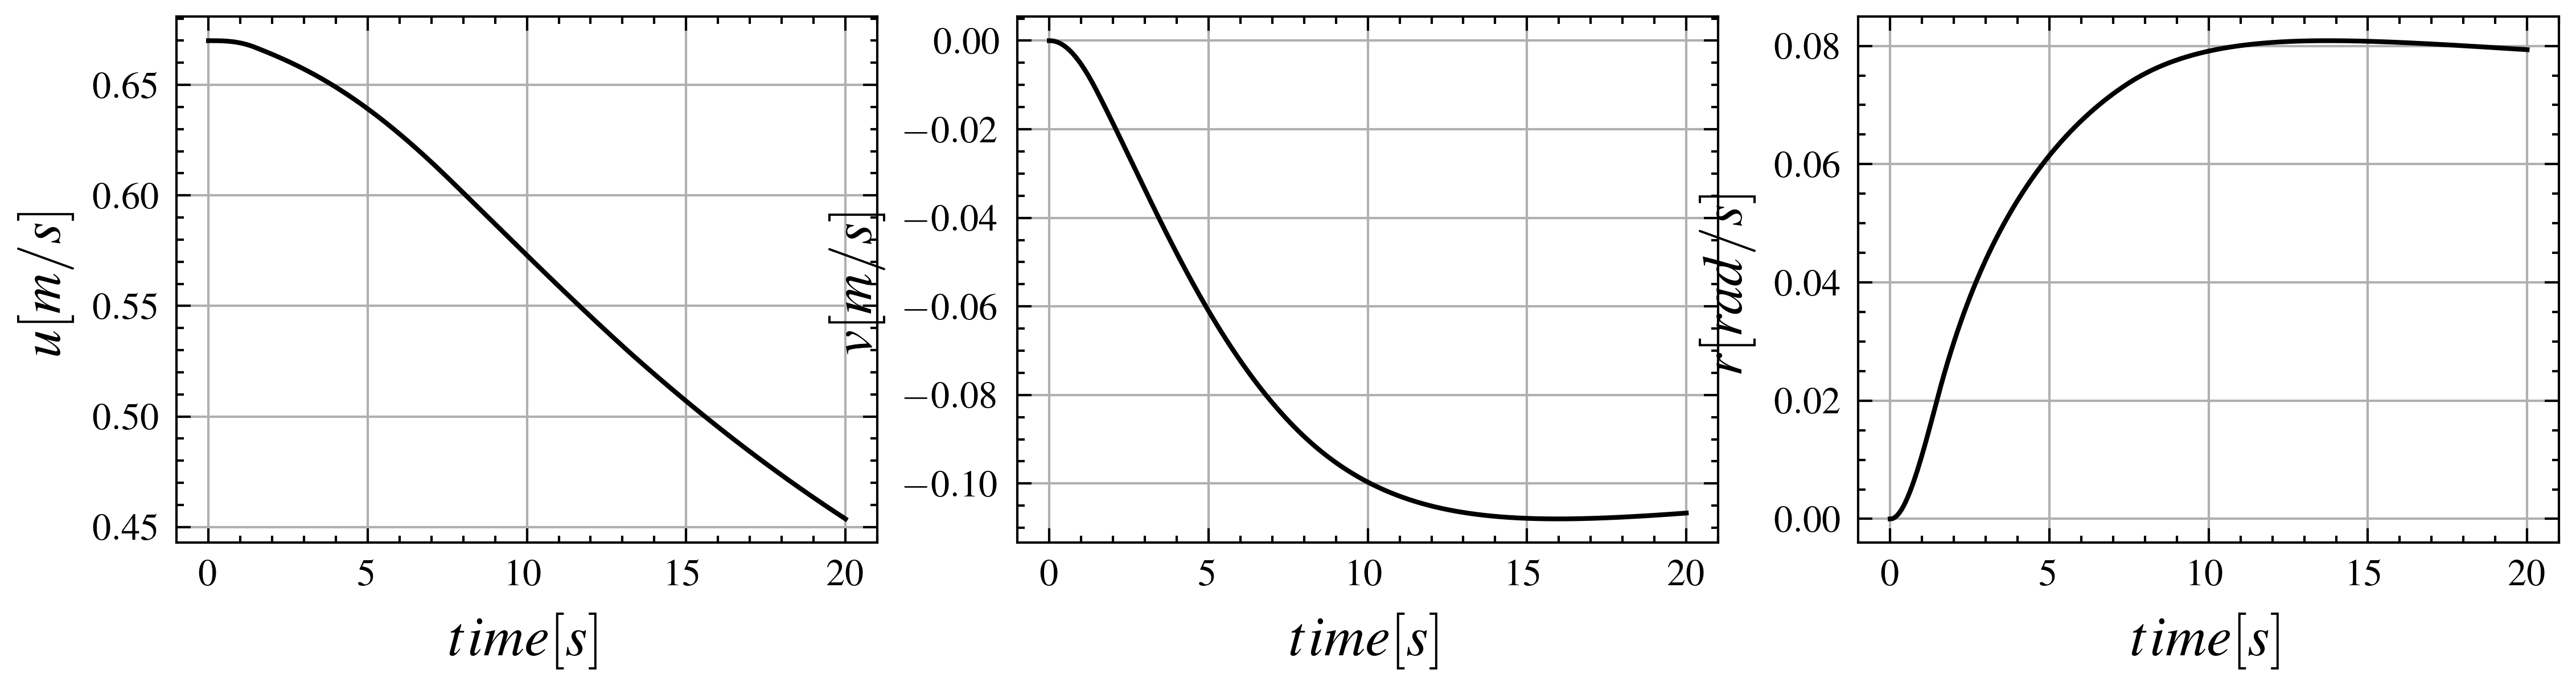

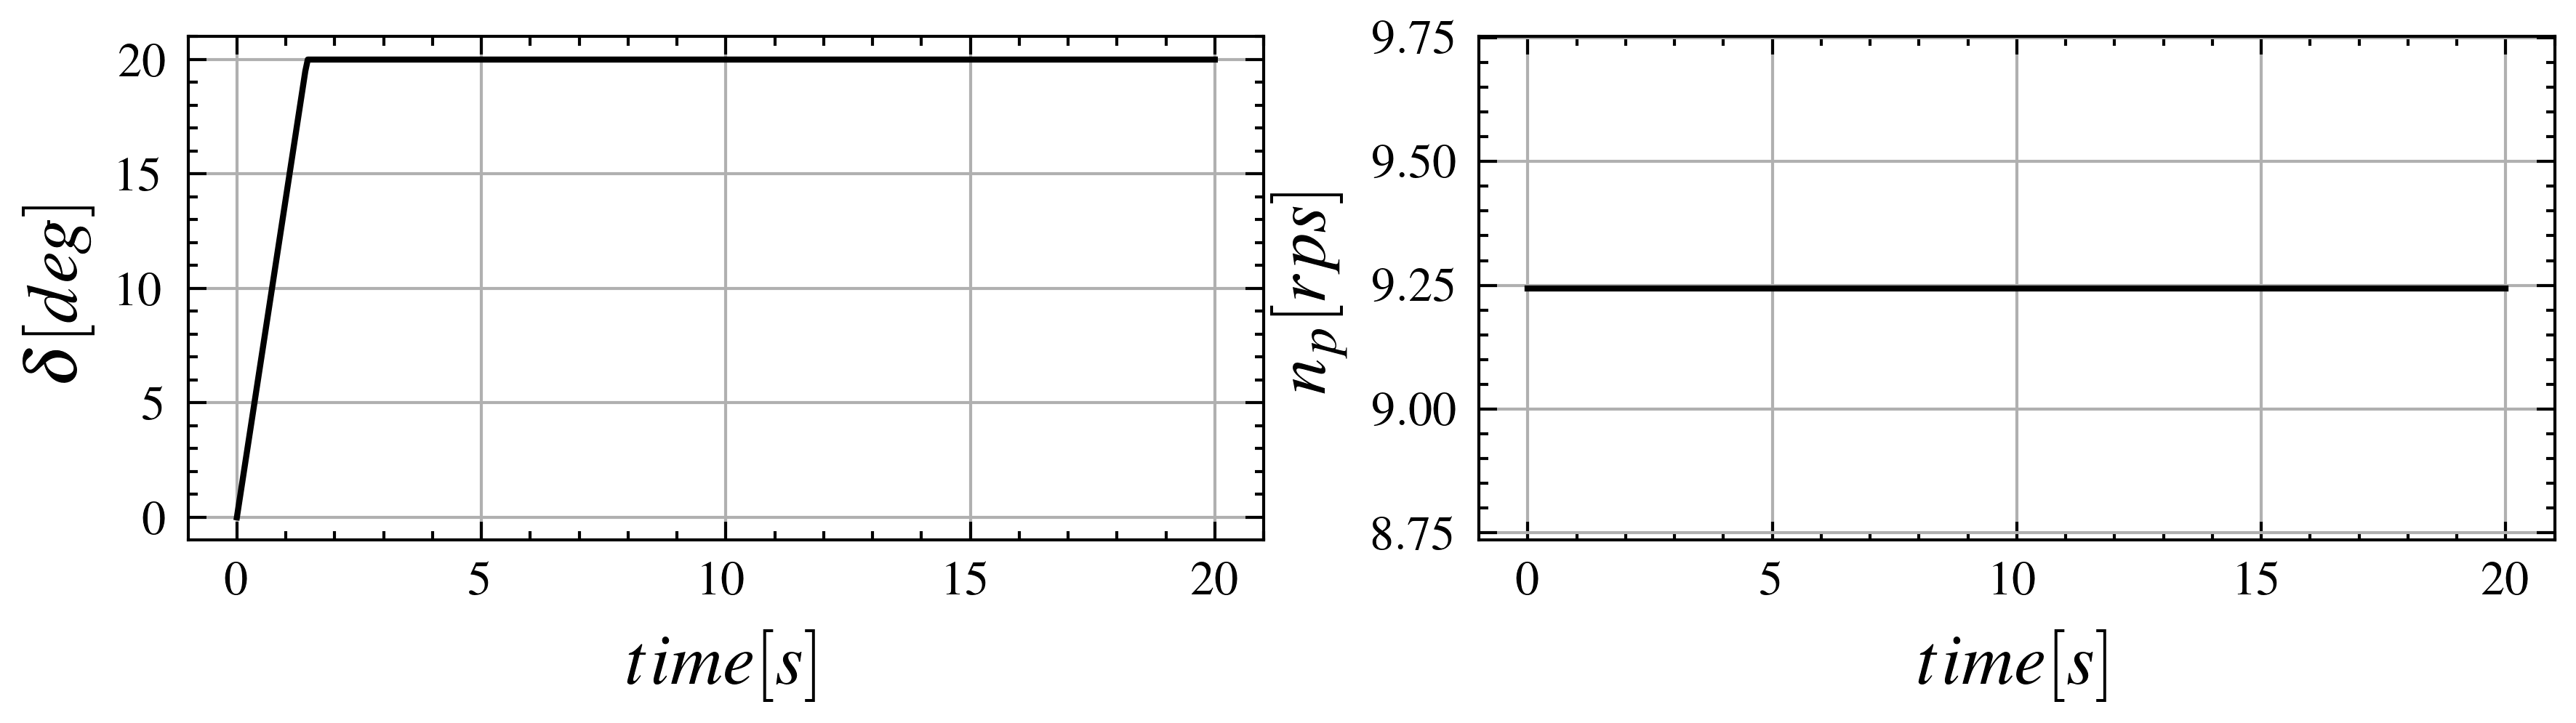

In [49]:
obs = CSV.read("20degmodel.csv", DataFrame)

plt.style.use(["science", "ieee"])
fig = plt.figure(figsize=(2, 2))
ax = fig.add_subplot(1, 1, 1)
ax.plot(obs[!, "y"],obs[!, "x"], "-", c="k", alpha=1, linewidth=0.7) 
ax.set_ylabel(L"x/L_{pp}", fontsize=12)
ax.set_xlabel(L"y/L_{pp}", fontsize=12)
ax.grid()
ax.axis("equal")
display(fig)

fig = plt.figure(figsize=(9,2))
ax = fig.add_subplot(1, 3, 1)
ax.plot(obs[!,"time"], obs[!,"u"], "-", c="k", linewidth=1)
ax.set_ylabel(L"u[m/s]", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(1, 3, 2)
ax.plot(obs[!,"time"], obs[!,"v"], "-", c="k", linewidth=1)
ax.set_ylabel(L"v[m/s]", fontsize=12)
ax.grid()

ax.set_xlabel(L"time[s]", fontsize=12)
ax = fig.add_subplot(1, 3, 3)
ax.plot(obs[!,"time"], obs[!,"r"], "-", c="k", linewidth=1)
ax.set_ylabel(L"r[rad/s]", fontsize=12)
ax.grid()
ax.set_xlabel(L"time[s]", fontsize=12)
display(fig)

fig = plt.figure(figsize=(7,1.5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(obs[!,"time"], obs[!,"δ"]./pi.*180, "-", c="k", linewidth=1)
ax.set_ylabel(L"\delta[deg]", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()
ax = fig.add_subplot(1, 2, 2)
ax.plot(obs[!,"time"], obs[!,"n_p"], "-", c="k", linewidth=1)
ax.set_ylabel(L"n_p[rps]", fontsize=12)
ax.grid()
ax.set_xlabel(L"time[s]", fontsize=12)
display(fig)

